# Exploring Trends: Dynamic Plotting with IPython Widgets


After making those plots, there was a lot of audio features left over to experiment with, so I decided to make a scatter plot that could make use of all of this data at once, and explore some of their relationships.

In this demonstration, I use IPython widgets, another method for building interactive plots in an IPython notebook.
IPython widgets allow us to easily add buttons, menus, text boxes, and other GUI elements to our scripts. This can be used to create dynamic plots and explore emerging trends.

Unfortunately, the 'ipywidgets' module did not play nice with the 'MPLD3' module used before (something about their styling methods was incompatible), so this time I was unable to add tooltip labels to the plots.

In [2]:
import json
import os.path
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display, clear_output

# To display plot inline in an IPython notebook
%matplotlib inline


# Check if JSON data file exists in folder path and read from it
if os.path.isfile("my_top_tracks.txt"):
    json_data = open("my_top_tracks.txt").read()
    my_top_tracks = json.loads(json_data)
    
else:
    print("Please run musicfetch.py to generate data.")

Like before, we begin by extracting the data from each dictionary into lists, using list comprehension. The lists are then placed in a single dictionary 'audio_feats', and assigned descriptive keys.

The keys are used in dropdown menu widgets so the user can assign any of the various lists as either the dependent or independent variables, or even as the basis for the color of the data points.
A button widget is used as a trigger for refreshing of the image after the variables are modified.

How many top tracks? 100


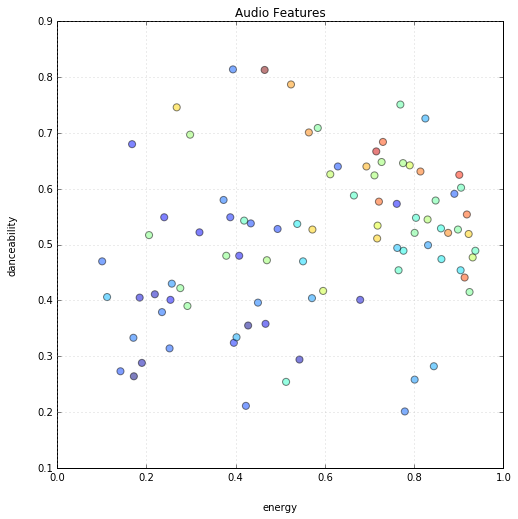

In [3]:
number = int(input("How many top tracks? "))

# Create lists for the audio features we can plot
audio_feats = {
               'acousticness': [track.get('acousticness') for track in my_top_tracks[:number]],
               'speechiness': [track.get('speechiness') for track in my_top_tracks[:number]],
               'energy': [track.get('energy') for track in my_top_tracks[:number]],
               'danceability': [track.get('danceability') for track in my_top_tracks[:number]],
               'valence': [track.get('valence') for track in my_top_tracks[:number]],
               'loudness': [track.get('loudness') for track in my_top_tracks[:number]],
               'tempo': [track.get('tempo') for track in my_top_tracks[:number]],
               'key': [track.get('key') for track in my_top_tracks[:number]],
               'liveness': [track.get('liveness') for track in my_top_tracks[:number]],
               'time signature': [track.get('time_signature')for track in my_top_tracks[:number]]
              }

# Create dropdown menu widgets to change the value of the lists
# that are used as x and y variables, as well as the color gradient

xlist = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['energy'],
    description=' X-axis:',
    padding = 4,
)

ylist = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['danceability'],
    description=' Y-axis:',
    padding = 4,
)

color_by = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['valence'],
    description=' Color by:',
    padding = 4,
)

# Container for aligning the dropdown widgets
h_container = widgets.HBox(children=[xlist, ylist, color_by], padding = 4)
display(h_container)

# Button for updating the figure
bttn_update = widgets.Button(description="Update Plot", padding = 4)
display(bttn_update)


def plot_audio_features():
    # Setup Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)

    # Create plot
    scatterplt = ax.scatter(xlist.value, ylist.value, s=50, c=color_by.value, alpha=0.5)
    
    ax.grid(color='#b2b2b2', linestyle='dotted')

    # Labels
    plt.ylabel(ylist.selected_label)
    plt.xlabel(xlist.selected_label)
    plt.title('Audio Features')
    ax.xaxis.labelpad=20
    ax.yaxis.labelpad=20
    
plot_audio_features()

# If button is clicked, clear cell and plot figure again
def on_button_clicked(b):
    clear_output()
    plot_audio_features()

# Event handler for clicking on the button
bttn_update.on_click(on_button_clicked)
